In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
import pickle
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
url='https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv'
df=pd.read_csv(url)
df.shape

(3140, 108)

In [72]:
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [73]:
list(df)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [74]:
df.drop_duplicates()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [75]:
df.dropna()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


ICU Beds_x
Total nurse practitioners (2019)	
Total physician assistants (2019)
Total Hospitals (2019)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ICU Beds_x', ylabel='Density'>

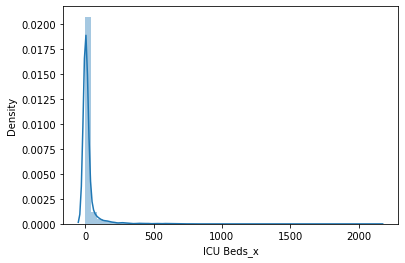

In [76]:
sns.distplot(df['ICU Beds_x'])

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Hospitals (2019)', ylabel='Density'>

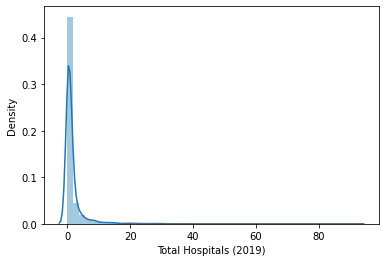

In [77]:
sns.distplot(df['Total Hospitals (2019)'])

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total physician assistants (2019)', ylabel='Density'>

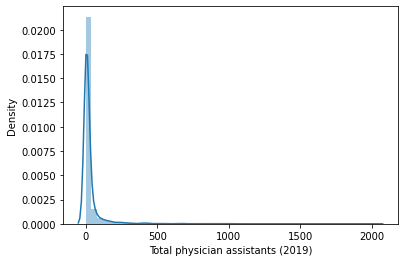

In [78]:
sns.distplot(df['Total physician assistants (2019)'])

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Active Physicians per 100000 Population 2018 (AAMC)', ylabel='Density'>

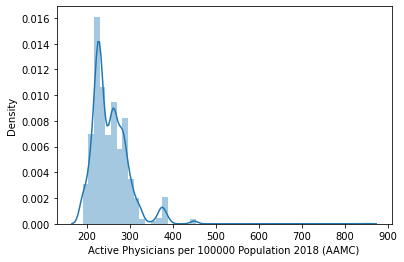

In [79]:
sns.distplot(df['Active Physicians per 100000 Population 2018 (AAMC)'])

In [80]:
describe=df.describe()

In [81]:
describe[['ICU Beds_x','Active Physicians per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)']]

,ICU Beds_x,Active Physicians per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019)
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,23.817516,254.923567,52.698009,28.215940,1.655299
std,84.602028,42.291759,153.878850,86.409281,4.293436
min,0.000000,191.300000,0.025524,0.009726,0.001363
25%,0.000000,227.600000,5.439135,2.475921,0.248797
50%,0.000000,247.100000,13.076544,5.969606,0.524404
75%,12.000000,278.800000,35.215580,18.598497,1.311585
max,2126.000000,847.000000,3937.767709,2022.531916,91.712638


<AxesSubplot:xlabel='ICU Beds_x', ylabel='Total Population'>

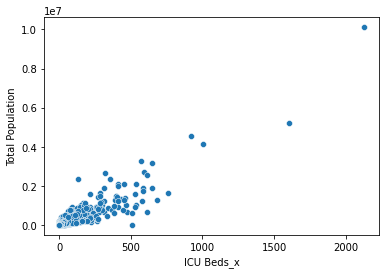

In [82]:
sns.scatterplot(x='ICU Beds_x', y='Total Population',data=df)

<AxesSubplot:xlabel='Total nurse practitioners (2019)', ylabel='Total Population'>

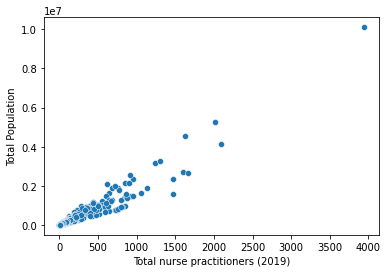

In [83]:
sns.scatterplot(x='Total nurse practitioners (2019)', y='Total Population',data=df)

hacer box pl;ot outliers
mapa de calor de corr
variables correlacionados por algo economico

<AxesSubplot:>

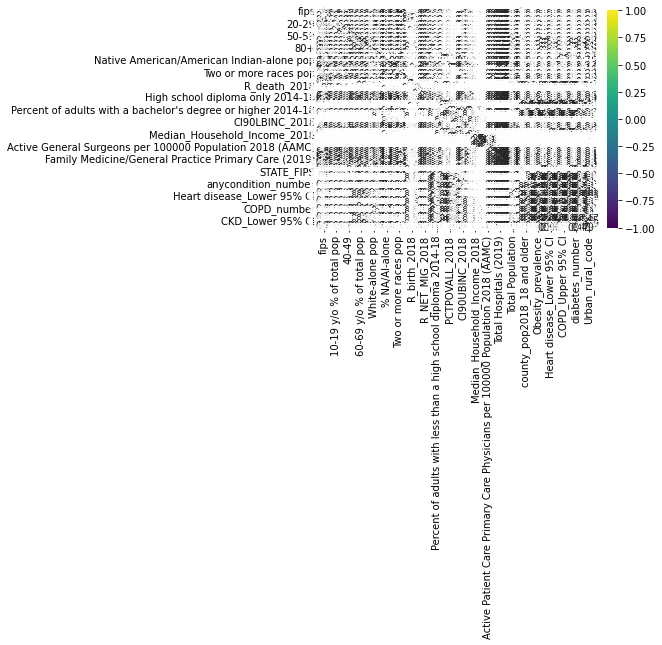

In [84]:
#plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

In [85]:
df.describe

<bound method NDFrame.describe of        fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.8149

In [86]:
x = df.drop(['Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
       'CKD_Upper 95% CI'],axis=1)
y = df['ICU Beds_x']

In [87]:
X

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,STATE_NAME_South Dakota,STATE_NAME_Tennessee,STATE_NAME_Texas,STATE_NAME_Utah,STATE_NAME_Vermont,STATE_NAME_Virginia,STATE_NAME_Washington,STATE_NAME_West Virginia,STATE_NAME_Wisconsin,STATE_NAME_Wyoming
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,0,0,0,0,0,0,0,0,0,0
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,0,0,0,0,0,0,0,0,0,0
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,0,0,0,0,0,0,0,0,0,0
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,0,0,0,0,0,0,0,0,0,0
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,0,0,0,0,0,0,0,0,0,1
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,0,0,0,0,0,0,0,0,0,1
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,0,0,0,0,0,0,0,0,0,1
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,0,0,0,0,0,0,0,0,0,1


In [88]:
X.select_dtypes(include='O')
#X=X.drop('COUNTY_NAME',axis=1)


""
0
1
2
3
4
...
3135
3136
3137
3138


In [89]:
X=pd.get_dummies(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

In [91]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), Lasso(alpha=2))
pipeline.fit(X_train, y_train)
print(pipeline[1].coef_, pipeline[1].intercept_)

[-0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.         -0.
  0.         -0.          0.          0.          0.         -0.
  7.35586839  0.          0.         -0.          9.42246605  0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         14.8341452   0.
  0.         -0.          0.         -0.         -0.          0.
  0.          0.          5.16215423 -0.         -0.          0.
  0.          0.          0.          0.          0.         -0.
 -1.00045393 -0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         16.78609059  0.
  4.03846058  0.          0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.         

In [92]:
coef_list=pipeline[1].coef_

In [93]:
loc=[i for i, e in enumerate(coef_list) if e != 0]

In [94]:
loc

[18, 22, 34, 44, 54, 70, 72, 95]

In [95]:
col_name=df.columns

In [96]:
col_name[loc]

Index(['80+', 'Black-alone pop', 'GQ_ESTIMATES_2018',
       'Bachelor's degree or higher 2014-18', 'CI90LBINC_2018',
       'Total Hospitals (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'COPD_prevalence'],
      dtype='object')

In [97]:
modelo = Lasso(alpha = 0.3,normalize = True)
modelo.fit(X_train,y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.3, normalize=True)

In [98]:
predicciones = modelo.predict(X_test)

In [101]:
rmse_lasso = mean_squared_error(
y_true = y_test,
y_pred = predicciones,
squared = False
)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 30.335016184797343


In [102]:
modelo = LassoCV(
alphas = np.logspace(-10, 3, 200),
normalize = True,
cv = 10
)
_ = modelo.fit(X = X_train, y = y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5335.1885978532955, tolerance: 1589.7009083923126
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3347.9174247737974, tolerance: 1589.7009083923126
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9865.853834629059, tolerance: 1589.7009083923126
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versio

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

Text(0.5, 1.0, 'Coeficientes del modelo en función de la regularización')

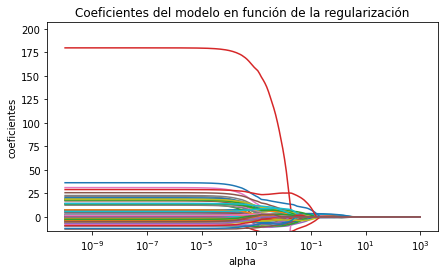

In [103]:
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización')


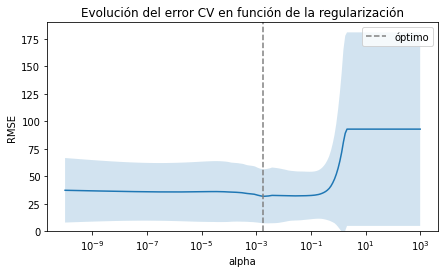

In [104]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)

mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse = np.min(rmse_cv)
sd_min_rmse = rmse_sd[np.argmin(rmse_cv)]
optimo = modelo.alphas_[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
modelo.alphas_,
rmse_cv + rmse_sd,
rmse_cv - rmse_sd,
alpha=0.2
)

ax.axvline(
x = optimo,
c = "gray",
linestyle = '--',
label = 'óptimo'
)



ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()

In [105]:
#grafica q mide el error con los dif alfas, vemos el alfa optimo es 
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")


Mejor valor de alpha encontrado: 0.001783430876931913


In [106]:
alfa_optimo = modelo.alpha_

modelo = Lasso(alpha = alfa_optimo,normalize = True)
modelo.fit(X_train,y_train)


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

Lasso(alpha=0.001783430876931913, normalize=True)

In [109]:
# Save best model

pickle.dump(modelo, open('../models/best_model_reg_linear.pickle', 'wb'))

In [110]:
modelo = pickle.load(open('../models/best_model_reg_linear.pickle', 'rb')) # lo leemos
modelo.predict(X_test) # lo usamos para predecir nueva X_test

array([ 2.83354565e+01,  4.24034842e+01,  1.62930390e+02,  7.47470586e+00,
        1.68628062e+01,  1.55021860e+00, -6.59972564e+00, -1.88814671e+00,
        1.08698480e+01,  9.47316889e-01,  2.02221793e+00,  1.92779940e+00,
       -5.09189470e+00,  1.17890193e+00,  1.09625230e+00, -1.37906234e+00,
        1.67905964e+00,  1.64754235e+00,  5.88248016e+00,  1.97322318e+01,
       -8.44921385e+00,  1.61363293e+02, -1.14681356e+00,  2.08501423e+01,
        1.52521959e+00, -5.94800342e+00, -4.63167040e+00,  3.14592714e+01,
        9.28331093e-01,  9.89491675e-01,  8.07387779e+00, -6.52892791e+00,
       -4.41333079e+00,  9.64622227e-01,  3.56327669e+01, -3.70904034e+00,
       -8.43885437e+00, -9.22162294e+01,  1.09615005e+01,  5.29520159e+00,
        2.10160163e+00, -1.08878491e+01,  2.23425349e+01,  1.39528503e+01,
        2.10199910e+01,  8.64258956e+00,  6.63558200e+00, -2.50230024e+00,
        4.50071839e+00,  1.09691810e+01, -8.54519983e+00,  1.74037683e+01,
        8.96532310e+00, -